# <center> Machine Learning Project

__Title__: Devtown Machine Learning Project

__Submitted by__: DIBYA RANJAN DASH

__Concepts Used__:
>Data Preprocessing

>Data Visualisation

> Linear Regression

## Import Libraries

In [179]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

## Read the data file

In [180]:
data = pd.read_csv('Housing.csv')

In [181]:
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## Check for null values

In [182]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Create Feature Matrix

In [183]:
Y = data.iloc[:,0].values
X = data.iloc[:,1:].values


In [184]:
X

array([[7420, 4, 2, ..., 2, 'yes', 'furnished'],
       [8960, 4, 4, ..., 3, 'no', 'furnished'],
       [9960, 3, 2, ..., 2, 'yes', 'semi-furnished'],
       ...,
       [3620, 2, 1, ..., 0, 'no', 'unfurnished'],
       [2910, 3, 1, ..., 0, 'no', 'furnished'],
       [3850, 3, 1, ..., 0, 'no', 'unfurnished']], dtype=object)

In [185]:
Y

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

## Encoding

In [186]:
# Using Ordinal Encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = np.array(enc.fit_transform(X))

In [187]:
X

array([[232.,   3.,   1., ...,   2.,   1.,   0.],
       [260.,   3.,   3., ...,   3.,   0.,   0.],
       [268.,   2.,   1., ...,   2.,   1.,   1.],
       ...,
       [ 72.,   1.,   0., ...,   0.,   0.,   2.],
       [ 35.,   2.,   0., ...,   0.,   0.,   0.],
       [ 90.,   2.,   0., ...,   0.,   0.,   2.]])

In [188]:
Y

array([13300000, 12250000, 12250000, 12215000, 11410000, 10850000,
       10150000, 10150000,  9870000,  9800000,  9800000,  9681000,
        9310000,  9240000,  9240000,  9100000,  9100000,  8960000,
        8890000,  8855000,  8750000,  8680000,  8645000,  8645000,
        8575000,  8540000,  8463000,  8400000,  8400000,  8400000,
        8400000,  8400000,  8295000,  8190000,  8120000,  8080940,
        8043000,  7980000,  7962500,  7910000,  7875000,  7840000,
        7700000,  7700000,  7560000,  7560000,  7525000,  7490000,
        7455000,  7420000,  7420000,  7420000,  7350000,  7350000,
        7350000,  7350000,  7343000,  7245000,  7210000,  7210000,
        7140000,  7070000,  7070000,  7035000,  7000000,  6930000,
        6930000,  6895000,  6860000,  6790000,  6790000,  6755000,
        6720000,  6685000,  6650000,  6650000,  6650000,  6650000,
        6650000,  6650000,  6629000,  6615000,  6615000,  6580000,
        6510000,  6510000,  6510000,  6475000,  6475000,  6440

## Splitting dataset into training and testing set

In [189]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size = 0.2,random_state=0)

In [190]:
Xtrain

array([[ 72.,   1.,   0., ...,   0.,   0.,   2.],
       [100.,   1.,   0., ...,   0.,   0.,   2.],
       [ 41.,   1.,   0., ...,   0.,   0.,   2.],
       ...,
       [172.,   2.,   1., ...,   1.,   1.,   2.],
       [ 71.,   2.,   0., ...,   1.,   0.,   2.],
       [206.,   2.,   0., ...,   0.,   1.,   0.]])

In [191]:
Ytrain

array([ 1750000,  2695000,  2870000,  2590000,  4515000,  4410000,
        4585000,  5250000,  3570000,  3640000,  9800000,  2940000,
        6083000,  3255000,  4893000,  3150000,  2975000,  6930000,
        3500000,  5880000,  3500000,  4235000,  3710000,  4060000,
        2345000,  4550000, 10150000,  3640000,  2660000,  2233000,
        2135000,  4277000,  6230000,  6300000,  3920000,  7350000,
        8400000,  5215000,  7420000,  6230000,  4900000,  4550000,
        4060000,  3010000,  7343000,  5600000,  7140000, 10150000,
        9870000,  3780000,  2940000,  2653000,  3836000,  4760000,
        7962500,  3143000,  3500000,  4690000,  4340000,  4515000,
        1767150,  3080000,  5950000,  5530000,  3150000,  7210000,
        2800000,  3045000,  2835000,  1820000,  3465000,  4200000,
        5040000,  7350000,  5250000,  4690000,  4900000,  5495000,
        1750000,  8120000,  3675000,  8890000,  3920000,  4550000,
        2275000,  7350000,  6650000,  8463000,  5250000,  6405

## Feature Scaling

In [192]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain[:,:] = sc.fit_transform(Xtrain[:,:])
Xtest[:,:] = sc.fit_transform(Xtest[:,:])

## PART B: Building the Model using Linear Regression

### Training the data

In [193]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(Xtrain,Ytrain)

LinearRegression()

### Testing the data

In [194]:
Yestimated = LR.predict(Xtest)

In [195]:
Yestimated

array([ 4133973.76158726,  6141674.11224314,  4352685.11560897,
        5969645.39990133,  3004737.84193797,  6985986.86918744,
        3356887.21535004,  3261137.27426093,  3579541.71650496,
        8172610.7270521 ,  6639966.68834167,  3863024.62788897,
        3673373.50805348,  4675782.1925281 ,  4080392.52021097,
        2021012.93205571,  4098896.83494392,  3788326.89911833,
        3207144.96564688,  4824926.61330625,  5728680.08025602,
        5978511.23459459,  4819176.8766858 ,  2694748.97510074,
        5529322.42977513,  5442798.43720815,  5578020.50294222,
        5476921.83634907,  5404300.58194331,  6054402.41409803,
        3474244.64977598,  5908249.44892651,  7094335.71652048,
        3060808.63249184,  4068426.23583717,  5296966.24251634,
        5121222.55961747,  3529983.98840109,  2929279.06485519,
        3839973.51451118,  7983607.54114661,  5122851.44247814,
        6430479.28534298,  3701096.86474883,  3964385.24010035,
        6342800.69031951,  4474238.53632

In [196]:
Ytest

array([ 4585000,  6083000,  4007500,  6930000,  2940000,  6195000,
        3535000,  2940000,  3500000,  7980000,  6755000,  3990000,
        3150000,  3290000,  4130000,  2660000,  4410000,  3710000,
        3360000,  4270000,  5005000,  5383000,  6440000,  1890000,
        6125000,  5460000,  5803000,  4620000,  5530000,  5950000,
        4305000,  3640000,  5250000,  3325000,  3703000,  4753000,
        9100000,  3500000,  3150000,  4270000,  8960000,  4060000,
        5740000,  3129000,  3633000,  7560000,  4620000,  3290000,
        4165000,  6650000,  4165000,  4690000,  3150000,  3850000,
        3290000,  5075000,  6510000,  5740000,  3780000,  4795000,
        4900000,  5460000,  3500000,  7525000,  2835000,  5495000,
        8680000,  4200000,  4200000,  4900000,  3332000,  6195000,
        4098500,  6650000,  3885000,  4620000,  1960000,  6440000,
        1750000,  3605000,  3290000,  4970000,  4613000,  3850000,
        3500000,  6107500,  3780000,  4900000,  3570000,  4340

In [197]:
Yestimated.reshape(len(Yestimated),1)
Ytest.reshape(len(Ytest),1)

array([[ 4585000],
       [ 6083000],
       [ 4007500],
       [ 6930000],
       [ 2940000],
       [ 6195000],
       [ 3535000],
       [ 2940000],
       [ 3500000],
       [ 7980000],
       [ 6755000],
       [ 3990000],
       [ 3150000],
       [ 3290000],
       [ 4130000],
       [ 2660000],
       [ 4410000],
       [ 3710000],
       [ 3360000],
       [ 4270000],
       [ 5005000],
       [ 5383000],
       [ 6440000],
       [ 1890000],
       [ 6125000],
       [ 5460000],
       [ 5803000],
       [ 4620000],
       [ 5530000],
       [ 5950000],
       [ 4305000],
       [ 3640000],
       [ 5250000],
       [ 3325000],
       [ 3703000],
       [ 4753000],
       [ 9100000],
       [ 3500000],
       [ 3150000],
       [ 4270000],
       [ 8960000],
       [ 4060000],
       [ 5740000],
       [ 3129000],
       [ 3633000],
       [ 7560000],
       [ 4620000],
       [ 3290000],
       [ 4165000],
       [ 6650000],
       [ 4165000],
       [ 4690000],
       [ 315

In [198]:
np.concatenate((Yestimated.reshape(len(Yestimated),1),Ytest.reshape(len(Ytest),1)),1)

array([[ 4133973.76158726,  4585000.        ],
       [ 6141674.11224314,  6083000.        ],
       [ 4352685.11560897,  4007500.        ],
       [ 5969645.39990133,  6930000.        ],
       [ 3004737.84193797,  2940000.        ],
       [ 6985986.86918744,  6195000.        ],
       [ 3356887.21535004,  3535000.        ],
       [ 3261137.27426093,  2940000.        ],
       [ 3579541.71650496,  3500000.        ],
       [ 8172610.7270521 ,  7980000.        ],
       [ 6639966.68834167,  6755000.        ],
       [ 3863024.62788897,  3990000.        ],
       [ 3673373.50805348,  3150000.        ],
       [ 4675782.1925281 ,  3290000.        ],
       [ 4080392.52021097,  4130000.        ],
       [ 2021012.93205571,  2660000.        ],
       [ 4098896.83494392,  4410000.        ],
       [ 3788326.89911833,  3710000.        ],
       [ 3207144.96564688,  3360000.        ],
       [ 4824926.61330625,  4270000.        ],
       [ 5728680.08025602,  5005000.        ],
       [ 5978

## Model Evaluation

In [199]:
LR.coef_

array([ 557380.8997698 ,  101179.76345558,  490379.49875455,
        352922.49148874,  132548.12457252,  115357.21855584,
        151769.81250967,  222826.81974239,  377595.13760442,
        189822.35861194,  301527.40722408, -197988.07937978])

In [200]:
LR.intercept_

4777635.183486238

In [205]:
from sklearn.metrics import r2_score
print(f"Accuracy Score: {r2_score(Ytest, Yestimated)}")

Accuracy Score: 0.6899838523256515


Text(0, 0.5, 'y_estimated')

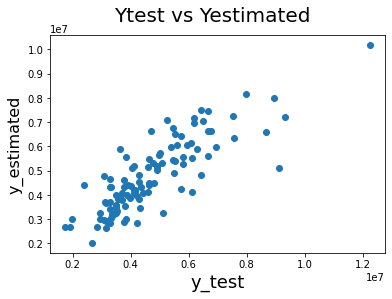

In [206]:
fig = plt.figure()
plt.scatter(Ytest,Yestimated)
fig.suptitle('Ytest vs Yestimated', fontsize=20)               
plt.xlabel('y_test', fontsize=18)                              
plt.ylabel('y_estimated', fontsize=16) 

So the __Accuracy__ of the __Linear Regression__ Model is __69%__ for __Housing.csv__ dataset